# Protein background in empty droplets

Zoë Steier
3/29/20

## Imports and settings

In [1]:
# Import required packages

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc 
import anndata
import seaborn as sns
from scipy import stats

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Plotting settings

colors = ["#3B7EA1", "#FDB515", "#D9661F", "#859438", "#EE1F60", "#00A598"]
sns.set(context="notebook", font_scale=1.3, style="ticks")
sns.set_palette(sns.color_palette(colors))
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['savefig.transparent'] = True
sc.settings._vector_friendly = True
DPI = 300

## Load data

In [10]:
# Read anndata object for SLN111-D1
adata = anndata.read("/data/yosef2/users/zsteier/totalVI/totalVI_journal/background/post_adata_111day1.h5ad")

## Plot background example histogram

In [11]:
# Find matched RNA-protein names
encoded_proteins = pd.Series(adata.var["encode"][adata.var["encode"] != "None"], name = "Protein")

In [12]:
# Cell type labels

# # B cells
bcells = np.array([
    c in ["1", "3", "4", "5", "7", "8", "9", "11", "13"]
    for c in adata.obs["leiden_subclusters"]
])

# CD4 T cells
cd4tcells = np.array([
    c in ["0", "14", "27", "10,0", "10,1"]
    for c in adata.obs["leiden_subclusters"]
])

# Treg
treg = np.array([
    c in ["10,0", "10,1"]
    for c in adata.obs["leiden_subclusters"]
])

# All T cells
tcells = np.array([
    c in ["0", "14", "27", "10,0", "10,1", # CD4
         "2", "6", "18"] # CD8
    for c in adata.obs["leiden_subclusters"]
])

# CD8 T cells
cd8tcells = np.array([
    c in ["2", "6", "18"] # CD8
    for c in adata.obs["leiden_subclusters"]
])

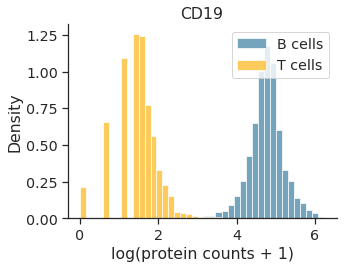

In [17]:
# Plot histogram of Raw CD19 expression in B cells vs T cells
# B cells
# T cells
# empty droplets

for RNA_name in ["Cd19"]:
    fig, ax = plt.subplots(figsize=(5, 4))
    #RNA_name = "Cd19"
    num_bins = 30
    protein = encoded_proteins[np.where(encoded_proteins.index == RNA_name)[0][0]]
#     ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]]), bins = num_bins,
#               density = True, color = ".4" # colors[3]
#               )
    ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]][bcells]), 
            bins = num_bins,
            alpha = 0.7,
            density = True, 
            color = colors[0],
            label = "B cells"
              )
    ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]][tcells]), 
        bins = num_bins,
        alpha = 0.7,
        density = True, 
        color = colors[1],
        label = "T cells"
          )
    plt.legend(loc='upper right')

    ax.set(ylabel = "Density")
    ax.set(xlabel = "log(protein counts + 1)")
    protein_title = protein.split("_")[1].split("(")[0]
    ax.set_title(protein_title)
    sns.despine()
    plt.tight_layout()

    #fig.savefig("/data/yosef2/users/zsteier/totalVI/totalVI_journal/background/background_figs_111day1/Denoised_%s_histogram.pdf" % protein_title, dpi=DPI, bbox_inches='tight')

## Add empty drops

In [3]:
# # Read in full data with scanpy (including empty droplets)
# SLN111d1_path = "/data/yosef2/users/zsteier/TotalSeq/20190814_BioLegend_ZRS08/cellranger_out/5_B6_spl_LN_r4_111/outs/raw_feature_bc_matrix/"

# adata_alldroplets = sc.read_10x_mtx(SLN111d1_path, gex_only=False)
# adata_alldroplets.obsm["protein_expression"] = adata_alldroplets[
#     :, adata_alldroplets.var["feature_types"] == "Antibody Capture"
# ].X.A

# adata_alldroplets.uns["protein_names"] = np.array(
#     adata_alldroplets.var_names[adata_alldroplets.var["feature_types"] == "Antibody Capture"]
# )
# adata_alldroplets = adata_alldroplets[
#     :, adata_alldroplets.var["feature_types"] != "Antibody Capture"
# ].copy()
# adata_alldroplets.X = adata_alldroplets.X.A
# adata_alldroplets.var_names_make_unique()

MemoryError: Unable to allocate array with shape (6794880, 28692) and data type float32

In [35]:
# Try reading as h5 file

SLN111d1_path = "/data/yosef2/users/zsteier/TotalSeq/20190814_BioLegend_ZRS08/cellranger_out/5_B6_spl_LN_r4_111/outs/raw_feature_bc_matrix.h5"

adata_alldroplets = sc.read_10x_h5(SLN111d1_path, gex_only=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [18]:
# Try reading as h5 file

SLN111d1_cells_path = "/data/yosef2/users/zsteier/TotalSeq/20190814_BioLegend_ZRS08/cellranger_out/5_B6_spl_LN_r4_111/outs/filtered_feature_bc_matrix.h5"

adata_celldroplets = sc.read_10x_h5(SLN111d1_cells_path, gex_only=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [36]:
# Remove .X.A, this makes it not sparse
adata_alldroplets.obsm["protein_expression"] = adata_alldroplets[
    :, adata_alldroplets.var["feature_types"] == "Antibody Capture"
].X

adata_alldroplets.uns["protein_names"] = np.array(
    adata_alldroplets.var_names[adata_alldroplets.var["feature_types"] == "Antibody Capture"]
)
adata_alldroplets = adata_alldroplets[
    :, adata_alldroplets.var["feature_types"] != "Antibody Capture"
].copy()
adata_alldroplets.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [37]:
adata_alldroplets

AnnData object with n_obs × n_vars = 6794880 × 28692 
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'protein_names'
    obsm: 'protein_expression'

In [19]:
# find which are the empty droplets
cellbc = adata_celldroplets.obs.index
allbc = adata_alldroplets.obs.index

In [22]:
# find empty droplets
emptybc = np.array([bc not in cellbc for bc in allbc])

In [23]:
np.sum(emptybc)

6783720

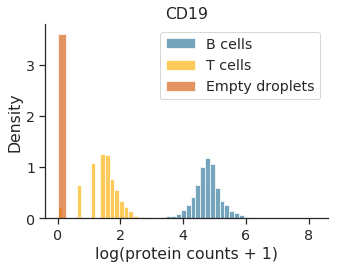

In [24]:
# Get CD19 expression from empty droplets and plot

# Plot histogram of Raw CD19 expression in B cells vs T cells
# B cells
# T cells
# empty droplets

for RNA_name in ["Cd19"]:
    fig, ax = plt.subplots(figsize=(5, 4))
    #RNA_name = "Cd19"
    num_bins = 30
    protein = encoded_proteins[np.where(encoded_proteins.index == RNA_name)[0][0]]
#     ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]]), bins = num_bins,
#               density = True, color = ".4" # colors[3]
#               )
    ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]][bcells]), 
            bins = num_bins,
            alpha = 0.7,
            density = True, 
            color = colors[0],
            label = "B cells"
              )
    ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]][tcells]), 
        bins = num_bins,
        alpha = 0.7,
        density = True, 
        color = colors[1],
        label = "T cells"
          )
    ax.hist(np.log1p(adata_alldroplets.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]][emptybc]), 
        bins = num_bins,
        alpha = 0.7,
        density = True, 
        color = colors[2],
        label = "Empty droplets"
          )
    plt.legend(loc='upper right')

    ax.set(ylabel = "Density")
    ax.set(xlabel = "log(protein counts + 1)")
    protein_title = protein.split("_")[1].split("(")[0]
    ax.set_title(protein_title)
    sns.despine()
    plt.tight_layout()

    #fig.savefig("/data/yosef2/users/zsteier/totalVI/totalVI_journal/background/background_figs_111day1/Denoised_%s_histogram.pdf" % protein_title, dpi=DPI, bbox_inches='tight')

In [ ]:
# Find droplets with between 20 and 100 RNA UMI counts (~80,000 droplets)

# Emptydrops threshold at 100 (below this is empty)

In [38]:
adata_empty = adata_alldroplets[emptybc, :]

In [39]:
adata_empty

View of AnnData object with n_obs × n_vars = 6783720 × 28692 
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'protein_names'
    obsm: 'protein_expression'

In [40]:
sc.pp.filter_cells(adata_empty, min_counts=20)
adata_empty

Trying to set attribute `.obs` of view, making a copy.


AnnData object with n_obs × n_vars = 78072 × 28692 
    obs: 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'protein_names'
    obsm: 'protein_expression'

In [41]:
sc.pp.filter_cells(adata_empty, max_counts=100)
adata_empty

AnnData object with n_obs × n_vars = 75358 × 28692 
    obs: 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'protein_names'
    obsm: 'protein_expression'

In [47]:
# Now that it's smaller, convert from sparse to full
adata_empty.obsm["protein_expression"] = adata_empty.obsm["protein_expression"].A

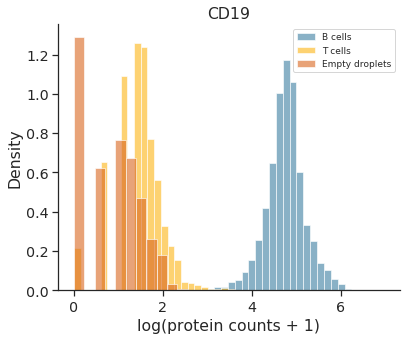

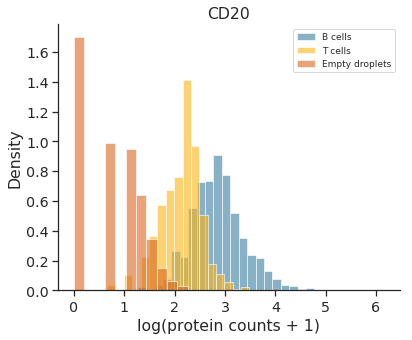

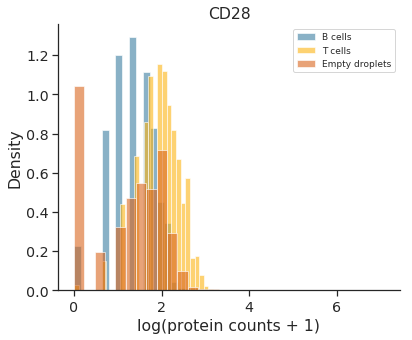

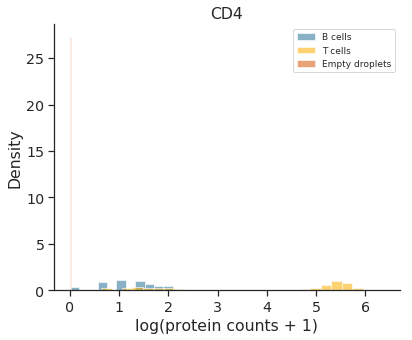

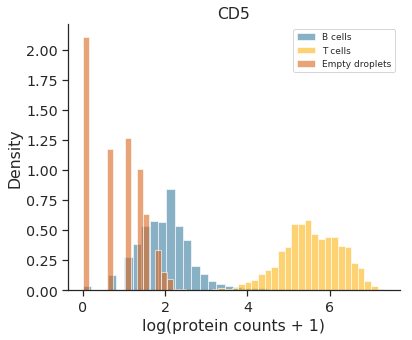

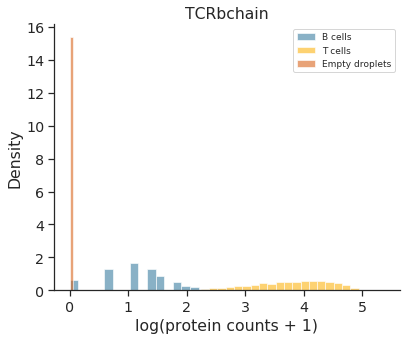

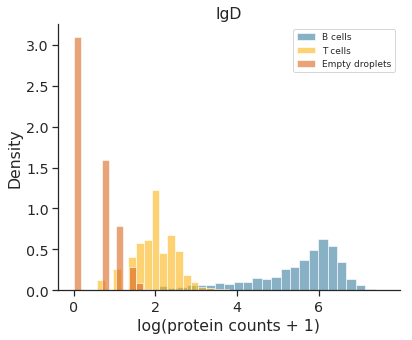

In [154]:
# Now plot
# Get CD19 expression from empty droplets and plot

# Plot histogram of Raw CD19 expression in B cells vs T cells
# B cells
# T cells
# empty droplets

for RNA_name in ["Cd19", "Ms4a1", "Cd28", "Cd4", "Cd5", "Trbc1", "Ighd"]:
    fig, ax = plt.subplots(figsize=(6, 5)) # 9, 7
    #RNA_name = "Cd19"
    num_bins = 30
    protein = encoded_proteins[np.where(encoded_proteins.index == RNA_name)[0][0]]
#     ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]]), bins = num_bins,
#               density = True, color = ".4" # colors[3]
#               )
    ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]][bcells]), 
            bins = num_bins,
            alpha = 0.6,
            density = True, 
            color = colors[0],
            label = "B cells"
              )
    ax.hist(np.log1p(adata.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]][tcells]), 
        bins = num_bins,
        alpha = 0.6,
        density = True, 
        color = colors[1],
        label = "T cells"
          )
    ax.hist(np.log1p(adata_empty.obsm["protein_expression"][:, np.where(adata.uns["totalVI_proteins"] == protein)[0][0]]), 
        bins = num_bins,
        alpha = 0.6,
        density = True, 
        color = colors[2],
        label = "Empty droplets"
          )
    plt.legend(loc='upper right', prop={'size': 9})

    ax.set(ylabel = "Density")
    ax.set(xlabel = "log(protein counts + 1)")
    protein_title = protein.split("_")[1].split("(")[0]
    ax.set_title(protein_title)
    sns.despine()
    plt.tight_layout()

    fig.savefig("/data/yosef2/users/zsteier/totalVI/totalVI_journal/background/background_figs_111day1/EmptyDrops_%s.pdf" % RNA_name, dpi=DPI, bbox_inches='tight')

In [98]:
# Make barcode rank plot to highlight empty drops

rna_umi = np.array(np.sum(adata_alldroplets.X, axis = 1))

In [118]:
# get ranks
umi_rank = np.argsort(rna_umi)[::-1]

In [119]:
rna_umi.shape

(6794880, 1)

In [120]:
sorted_umis = rna_umi[umi_rank]

In [121]:
sorted_umis.ravel()[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

In [122]:
np.max(rna_umi)

60988.0

In [123]:
np.max(umi_rank)

0

In [134]:
sorted_umis = np.sort(rna_umi, axis = None)

In [135]:
np.argmax(rna_umi)

2841107

In [136]:
np.argmax(sorted_umis)

6794879

In [141]:
len(sorted_umis)

6794880

In [143]:
sorted_umis[6794879]

60988.0

In [144]:
sorted_umis[-5:]

array([47629., 49454., 49916., 51485., 60988.], dtype=float32)

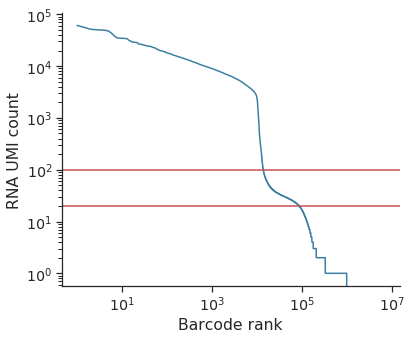

In [153]:
# plot ranks
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(range(1, len(sorted_umis) + 1), sorted_umis[::-1])
ax.axhline(y = 20, color='r')
ax.axhline(y = 100, color = 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set(ylabel = "RNA UMI count")
ax.set(xlabel = "Barcode rank")
sns.despine()
plt.tight_layout()

fig.savefig("/data/yosef2/users/zsteier/totalVI/totalVI_journal/background/background_figs_111day1/barcode_rank_emptydrops.pdf", dpi=DPI, bbox_inches='tight')